# 朴素预测方法1


从简单的方法开始考虑以下图。假设y轴代表硬币的价格（或是销量)，x轴代表时间（天）。

![Start with a Naive Approach](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/02/naive_new-768x495.png)

我们可以从图中推断出价格从一开始就是稳定的。很多时候，我们会获得一个数据集，该数据集在整个时间段内都是稳定的。如果我们要预测第二天的价格，我们可以简单地获取最后一天的价格
并估算第二天的价格。这种将下一个预期点等于最后一个观测点的预测技术称为朴素预测方法。

### Naive Method - 朴素预测方法

Peter注：大家看到这种办法不要觉得好笑，现在情况下预测第二天股价用这种办法是最偏差最小的办法之一，因为你没有办法知道明天会发生什么。
 




## 读取数据
* 我们还是会使用澳洲空乘数据


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# url = "../data/AirPassengers.csv" 如果把这个仓库下载后可以使用这个地址
# 如果后面有发现文件读不出来，可以自己手工把 .. 换成 https://raw.githubusercontent.com/liuhui998/time-series-little-book/master
# 但是这需要挂了 VPN, 因为课件还在开发过程中，大家多包涵
url = "../data/AirPassengers.csv"
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


##  训练集与测度集
* 数据拆分为两类：较大规模的训练数据集和较小规模的测试数据集
  * 训练集 - 用于训练模型的子集。
  * 测试集 - 用于测试训练后模型的子集。
  
    您可以想象按如下方式拆分单个数据集：
    ![](../images/PartitionTwoSets.svg?hl=zh-cn)
    
* 为什么要分训练集和测试集

  因为未来的事情还没有发生，只有抽出有一段数据做测试数据，这样才能确认模型的性能
  
  
  
* 怎么切分训练集与测试集

  对于时间序列一般是选取一个周期的数据（比如12个月或是1周), 但是训练集和测试集一定要分开
  
  一般训练数数据叫 train, 测试数据叫 test

In [2]:
# 因为周期为 12个月，test_num 就为12
test_num = 12 
train = data.iloc[0:-test_num,:]
print(train.shape)
test = data.iloc[-test_num:,:]
print(test.shape)

(132, 1)
(12, 1)


In [3]:
train.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 组合预测数据
* 将 train,test 拼到一个 fcst_df
* 然后将 train, test 画出来
* 大家想像一下，只有 train, 来预测 test 的情况

In [4]:
fcst_df = pd.DataFrame({
    'train': train['Passengers'],
    'test' : test['Passengers']
})
fcst_df.describe()

,train,test
count,132.000000,12.000000
mean,262.492424,476.166667
std,106.625799,77.737125
min,104.000000,390.000000
25%,176.500000,418.500000
50%,239.500000,461.000000
75%,343.250000,514.750000
max,559.000000,622.000000


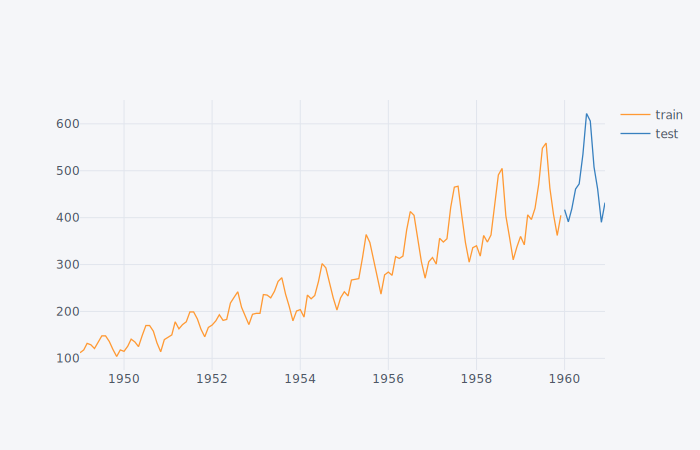

In [5]:
import cufflinks as cf
fcst_fig = fcst_df.iplot(asFigure = True)
fcst_fig.show('svg')

### 使用 简单（Navie） 方法进行预测
* 以 train 最后一条记录为预测值
* 把预测值放到 fcst_df
* 在可视化环节，大家可以多思考一下

In [6]:

last_value = train.iloc[-1,:]['Passengers']
fcst_series = pd.Series(last_value,index = test.index)
fcst_series

Month
1960-01-01    405
1960-02-01    405
1960-03-01    405
1960-04-01    405
1960-05-01    405
1960-06-01    405
1960-07-01    405
1960-08-01    405
1960-09-01    405
1960-10-01    405
1960-11-01    405
1960-12-01    405
dtype: int64

In [7]:
fcst_df['fcst'] = fcst_series

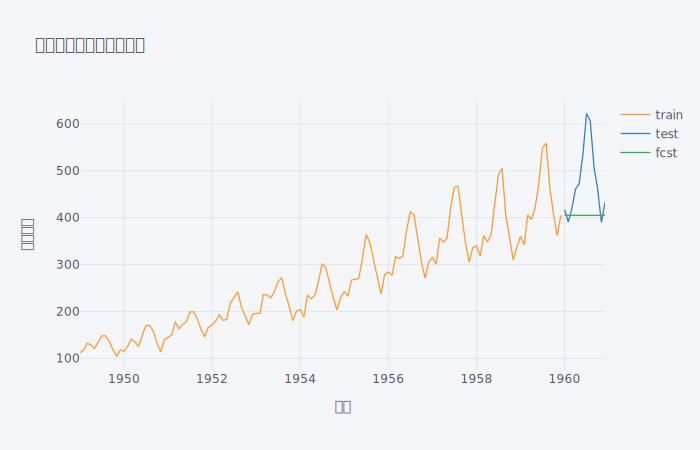

In [8]:
new_fcst_fig = fcst_df.iplot(asFigure = True, xTitle="时间",yTitle="乘客数量", title="预测最近一年航空乘客数")
new_fcst_fig.show('svg')

## 未完成部分

* 澳洲空乘数据不大适合做为 Navie 方法的演示，后面补充合适的数据集
* 增加验证预测模型性能（准确性）的代码

## 参考资料
* (7 methods to perform Time Series forecasting)[https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/]